In [0]:
import torch
import random
import numpy as np

import torchvision.datasets

from google.colab import files

In [0]:
def set_seed(n_seed):
  random.seed(n_seed)
  np.random.seed(n_seed)
  torch.manual_seed(n_seed)
  torch.cuda.manual_seed(n_seed)
  torch.backends.cudnn.deterministic = True

In [0]:
class LeNet5(torch.nn.Module):
  def __init__(self):
    super(LeNet5, self).__init__()

    self.conv1 = torch.nn.Conv2d(
        in_channels=1, out_channels=6, kernel_size=5, padding=2)
    self.act1 = torch.nn.ELU()
    self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

    self.conv2 = torch.nn.Conv2d(
        in_channels=6, out_channels=16, kernel_size=5, padding=2)
    self.act2 = torch.nn.ELU()
    self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=1)

    self.conv3 = torch.nn.Conv2d(
        in_channels=16, out_channels=16, kernel_size=3, padding=0)
    self.act3 = torch.nn.ELU()
    self.pool3 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

    self.fc1 = torch.nn.Linear(400, 200)
    self.act4 = torch.nn.Tanh()

    self.fc4 = torch.nn.Linear(200, 120)
    self.act6 = torch.nn.Tanh()

    self.fc2 = torch.nn.Linear(120, 84)
    self.act5 = torch.nn.Tanh()

    self.fc3 = torch.nn.Linear(84, 10)

  def forward(self, x):
    x = self.conv1(x)
    x = self.act1(x)
    x = self.pool1(x)

    x = self.conv2(x)
    x = self.act2(x)
    x = self.pool2(x)

    x = self.conv3(x)
    x = self.act3(x)
    x = self.pool3(x)

    x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))  # x.size(0) - batch_size

    x = self.fc1(x)
    x = self.act4(x)
    x = self.fc4(x)
    x = self.act6(x)
    x = self.fc2(x)
    x = self.act5(x)
    x = self.fc3(x)
    
    return x

In [0]:
def train_model(device, x_train, x_test, y_train, y_test):
  batch_size = 100

  test_acc_history = []
  test_loss_history = []

  x_test = x_test.to(device)
  y_test = y_test.to(device)

  for epoch in range(200):
    order = np.random.permutation(len(x_train))
    for start_index in range(0, len(x_train), batch_size):
      optimizer.zero_grad()

      batch_indexes = order[start_index:start_index+batch_size]

      x_batch = x_train[batch_indexes].to(device)
      y_batch = y_train[batch_indexes].to(device)    

      predict = lenet5.forward(x_batch)

      loss_value = loss(predict, y_batch)
      loss_value.backward()

      optimizer.step()

    test_predict = lenet5.forward(x_test)

    # to list only values not all graph (.data.cpu() not just .cpu())
    test_loss_history.append(loss(test_predict, y_test).data.cpu())

    accuracy = (test_predict.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_acc_history.append(accuracy)

    if epoch % 25 == 0:
      print(epoch, accuracy)

  return test_acc_history

In [0]:
mnist_train = torchvision.datasets.MNIST('./', download=True, train=True)
mnist_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [0]:
x_train = mnist_train.train_data
y_train = mnist_train.train_labels
x_test = mnist_test.test_data
y_test = mnist_test.test_labels

x_train = x_train.unsqueeze(1).float()
x_test = x_test.unsqueeze(1).float()

for seed in range(10):
  print("Seed", seed)
  set_seed(seed)

  lenet5 = LeNet5()

  device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
  lenet5 = lenet5.to(device)

  loss = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(lenet5.parameters(), lr=0.01, momentum=0.8)
  # optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

  acc = train_model(device, x_train, x_test, y_train, y_test)
  
  np.savetxt('example' + str(seed) + '.csv', np.asarray(acc))

In [0]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (13.0, 7.0)

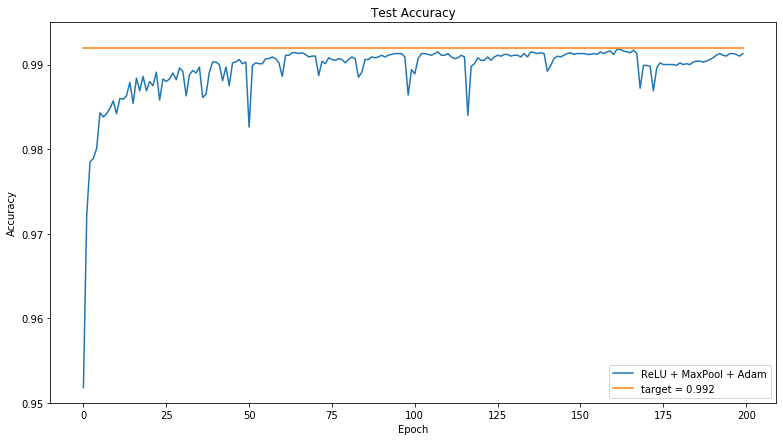

In [33]:
plt.plot(test_acc_history_adam);
plt.plot(torch.linspace(0.992, 0.992, 200))
plt.title("Test Accuracy");
plt.xlabel('Epoch');
plt.ylabel('Accuracy');
plt.legend(['ReLU + MaxPool + Adam', 'target = 0.992'])
plt.ylim(0.95, 0.995);

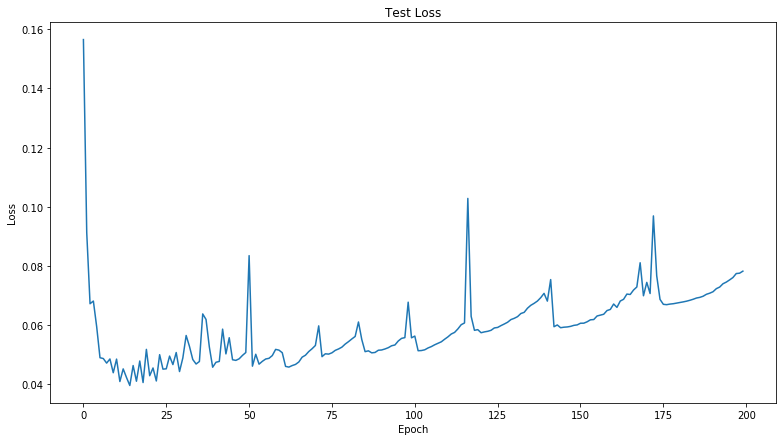

In [34]:
plt.plot(test_loss_history_adam);
plt.title("Test Loss");
plt.xlabel('Epoch');
plt.ylabel('Loss');

 ========================================================================================================

In [0]:
import time

In [0]:
class LeNet5(torch.nn.Module):
  def __init__(self):
    super(LeNet5, self).__init__()

    self.conv1 = torch.nn.Conv2d(
        in_channels=1, out_channels=6, kernel_size=5, padding=2)
    self.act1 = torch.nn.ELU()
    self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

    self.conv2 = torch.nn.Conv2d(
        in_channels=6, out_channels=16, kernel_size=5, padding=0)
    self.act2 = torch.nn.ELU()
    self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

    self.fc1 = torch.nn.Linear(400, 120)
    self.act4 = torch.nn.Tanh()

    self.fc2 = torch.nn.Linear(120, 84)
    self.act5 = torch.nn.Tanh()

    self.fc3 = torch.nn.Linear(84, 10)

  def forward(self, x):
    x = self.conv1(x)
    x = self.act1(x)
    x = self.pool1(x)

    x = self.conv2(x)
    x = self.act2(x)
    x = self.pool2(x)

    x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))  # x.size(0) - batch_size

    x = self.fc1(x)
    x = self.act4(x)
    x = self.fc2(x)
    x = self.act5(x)
    x = self.fc3(x)
    
    return x

In [0]:
lenet5 = LeNet5()

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5 = lenet5.to(device)

In [0]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(lenet5.parameters(), lr=0.01, momentum=0.8)

In [0]:
batch_size = 100

test_acc_history_sgd = []
test_loss_history_sgd = []

x_test = x_test.to(device)
y_test = y_test.to(device)

start = time.time()
for epoch in range(200):
  order = np.random.permutation(len(x_train))
  for start_index in range(0, len(x_train), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    x_batch = x_train[batch_indexes].to(device)
    y_batch = y_train[batch_indexes].to(device)    

    predict = lenet5.forward(x_batch)

    loss_value = loss(predict, y_batch)
    loss_value.backward()

    optimizer.step()

  test_predict = lenet5.forward(x_test)

  # to list only values not all graph (.data.cpu() not just .cpu())
  test_loss_history_sgd.append(loss(test_predict, y_test).data.cpu())

  accuracy = (test_predict.argmax(dim=1) == y_test).float().mean().data.cpu()
  test_acc_history_sgd.append(accuracy)

  if epoch % 50 == 0:
    print(epoch, accuracy, (time.time() - start) / 1e6)

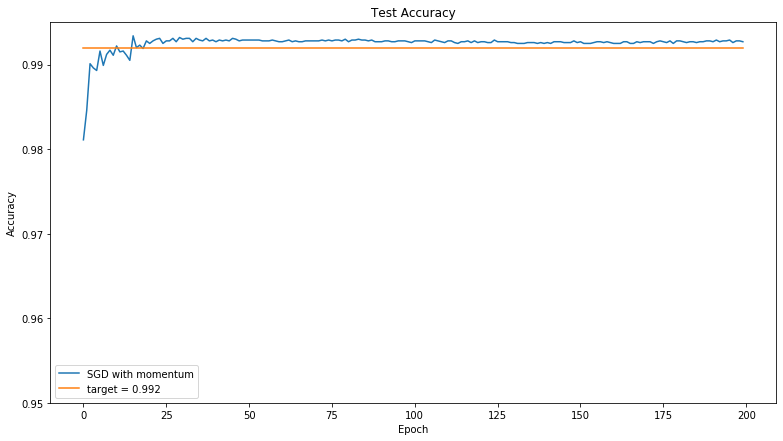

In [36]:
plt.plot(test_acc_history_sgd);
plt.plot(torch.linspace(0.992, 0.992, 200))
plt.title("Test Accuracy");
plt.xlabel('Epoch');
plt.ylabel('Accuracy');
plt.legend(['SGD with momentum', 'target = 0.992'])
plt.ylim(0.95, 0.995);

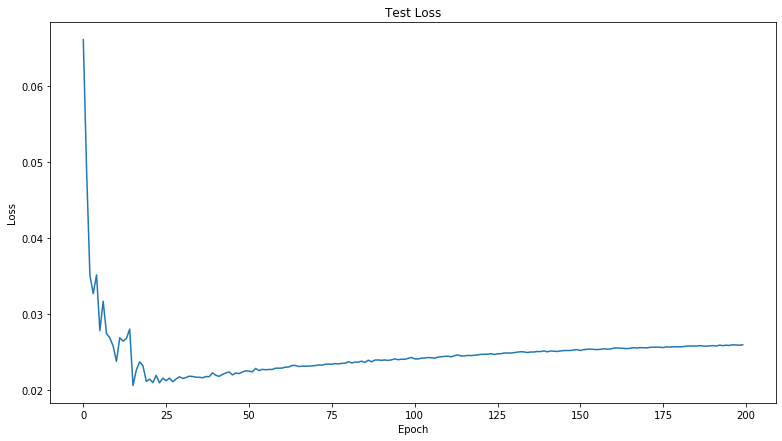

In [37]:
plt.plot(test_loss_history_sgd);
plt.title("Test Loss");
plt.xlabel('Epoch');
plt.ylabel('Loss');